# Home Brew Craft Beer

[jtrofe] provided a dataset of 75,000 homebrewed beers with over 176 different styles. 

Beer records are user-reported and are classified according to one of the 176 different styles. These recipes go into as much or as little detail as the user provided, but there's are least 5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, and Color

The user-submitted beer recipes was scraped from [Brewer's Friend]. All columns standardized except "Priming Method" and "Priming Amount", which seems like it just let the users write whatever they wanted.

[jtrofe]:(https://www.kaggle.com/jtrofe)
[Brewer's Friend]:(https://www.brewersfriend.com/search/)

In [1]:
import numpy as np
import pandas as pd
#from dateutil.parser import parse
#from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
recipe = pd.read_csv('Data/recipeData.csv',encoding='latin1')

## What Does The Data Look Like?

In [3]:
recipe.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [4]:
recipe.columns


Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [5]:
recipe.shape

(73861, 23)

In [6]:
recipe.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

## Data Cleaning
Remove the features with **way** too many NULL values. There are additional features that should be dropped, such as `StyleID`, `BeerID` and `URL`.

In [7]:
# These features have too many missing values, and they only relate to the brewing process and not the style.
recipe.drop(['MashThickness','PitchRate','PrimaryTemp','PrimingMethod','PrimingAmount','UserId'],axis=1, inplace=True)
# StyleID is a identifier for the Style, so we can remove this feature
recipe.drop(['StyleID'],axis=1, inplace=True)
#recipe.drop(['Name','BeerID','URL'],axis=1, inplace=True)

In [8]:
# Remove all the remaining Null values from the data
recipe = recipe[recipe['Style'].isnull() == False]
recipe = recipe[recipe['BoilGravity'].isnull() == False]
recipe.reset_index(drop=True, inplace=True)

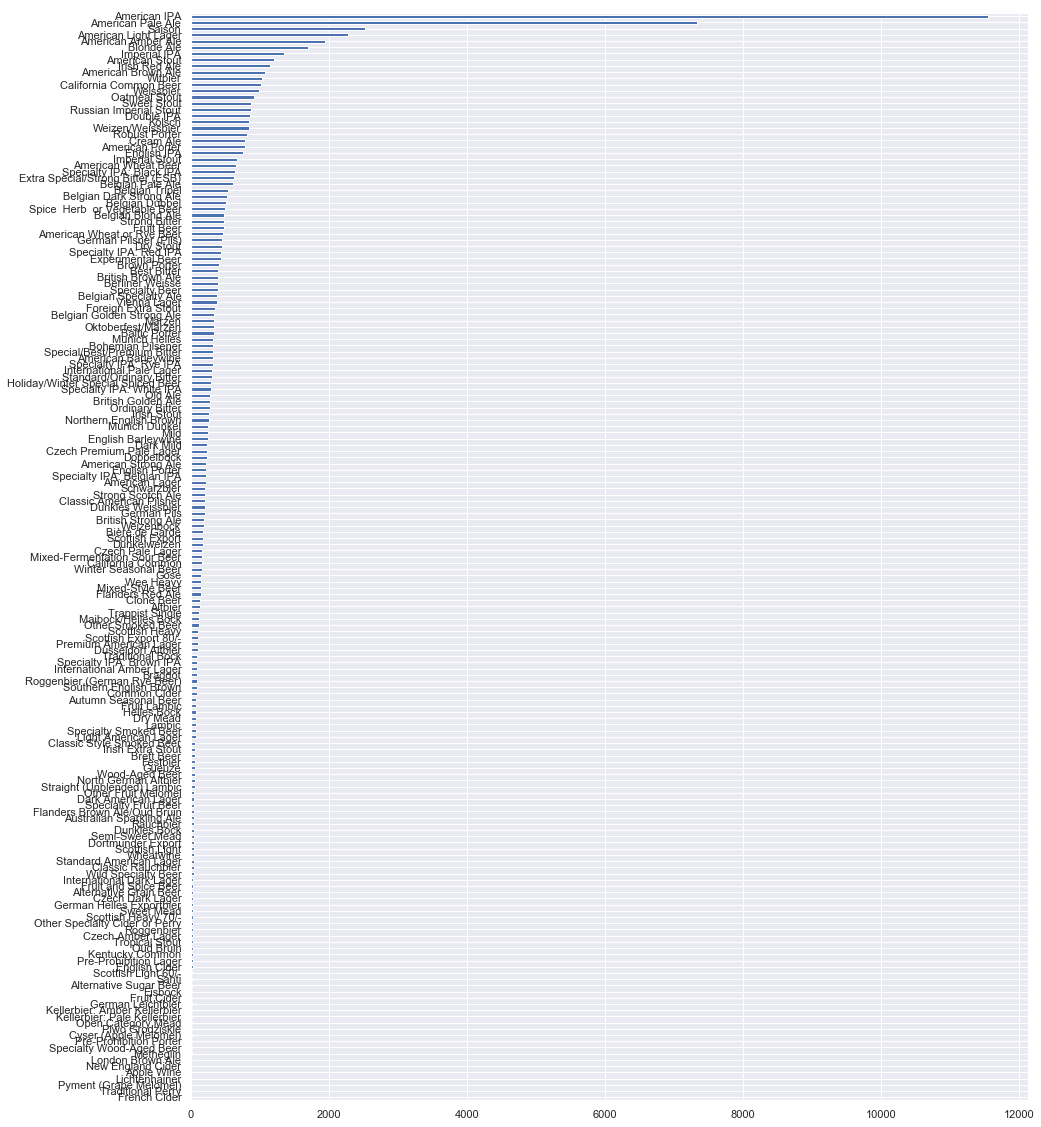

In [9]:
recipe['Style'].value_counts().sort_values().plot(kind='barh',figsize=(15,20));

We can combine some of these styles to reduce the number of classes we need to predict, as they are mostly variants of each other.

In [10]:
# Group the Parent_Styles into a common base Parent_Style.
recipe['Parent_Style'] = recipe['Style']

recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Amber') == True] = 'Amber'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Brown') == True] = 'Brown'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('IPA') == True] = 'IPA'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Lager') == True] = 'Lager'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Light') == True] = 'Light'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Pale') == True] = 'Pale Ale'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Porter') == True] = 'Porter'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Stout') == True] = 'Stout'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Belgian') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Weisse') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Wheat') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Wee') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Weis') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Dunk') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('lsch') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Weiz') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Wit') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Wee') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('bier') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Seasonal') == True] = 'Seasonal'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Spec') == True] = 'Specialty'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Fruit') == True] = 'Specialty'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Pils') == True] = 'Pilsner'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Blonde') == True] = 'Blonde'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Common') == True] = 'Lager'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('German') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Bock') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('bock') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Dort') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Alt') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Keller') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Munich') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('English') == True] = 'English'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Imperial') == True] = 'English'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('British') == True] = 'English'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Oktober') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Saison') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Rogg') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Schwarz') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Dubbel') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Tripel') == True] = 'Belgian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Russian') == True] = 'Russian'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('German') == True] = 'German'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Scottish') == True] = 'Scottish'
recipe['Parent_Style'][recipe['Parent_Style'].str.contains('Irish') == True] = 'Irish'


possible_Parent_Styles = ['Amber','Brown','IPA','Lager','Light','Pale Ale','Porter','Stout',
                   'Belgian','Pilsner','Seasonal','Blonde','German','English','Saison',
                   'Russian','Scottish','Specialty','Irish']

recipe['Parent_Style'][recipe['Parent_Style'].isin(possible_Parent_Styles) == False] = 'Other'



In [11]:
recipe.head()

,BeerID,Name,URL,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,Parent_Style
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,Specific Gravity,All Grain,Other
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,Specific Gravity,All Grain,Specialty
2,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,Specific Gravity,All Grain,Belgian
3,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,Specific Gravity,All Grain,Pale Ale
4,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,Specific Gravity,All Grain,Other


In [12]:
# Convert the styles into numerical codes so they can be added in the models
recipe['StyleId'] = recipe['Style'].astype('category').cat.codes
# Convert the remaining categorical variables into dummy variables
dummies = pd.get_dummies(recipe[['SugarScale','BrewMethod']])

recipe = pd.concat([recipe,dummies],axis=1)

recipe.head()

,BeerID,Name,URL,Style,Size(L),OG,FG,ABV,IBU,Color,...,SugarScale,BrewMethod,Parent_Style,StyleId,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,21.77,1.055,1.013,5.48,17.65,4.83,...,Specific Gravity,All Grain,Other,44,0,1,1,0,0,0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,20.82,1.083,1.021,8.16,60.65,15.64,...,Specific Gravity,All Grain,Specialty,84,0,1,1,0,0,0
2,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,50.00,1.060,1.010,6.48,17.84,4.57,...,Specific Gravity,All Grain,Belgian,19,0,1,1,0,0,0
3,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,24.61,1.055,1.013,5.58,40.12,8.00,...,Specific Gravity,All Grain,Pale Ale,9,0,1,1,0,0,0
4,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,20.82,1.054,1.014,5.36,19.97,5.94,...,Specific Gravity,All Grain,Other,44,0,1,1,0,0,0


## Exploratory Analysis

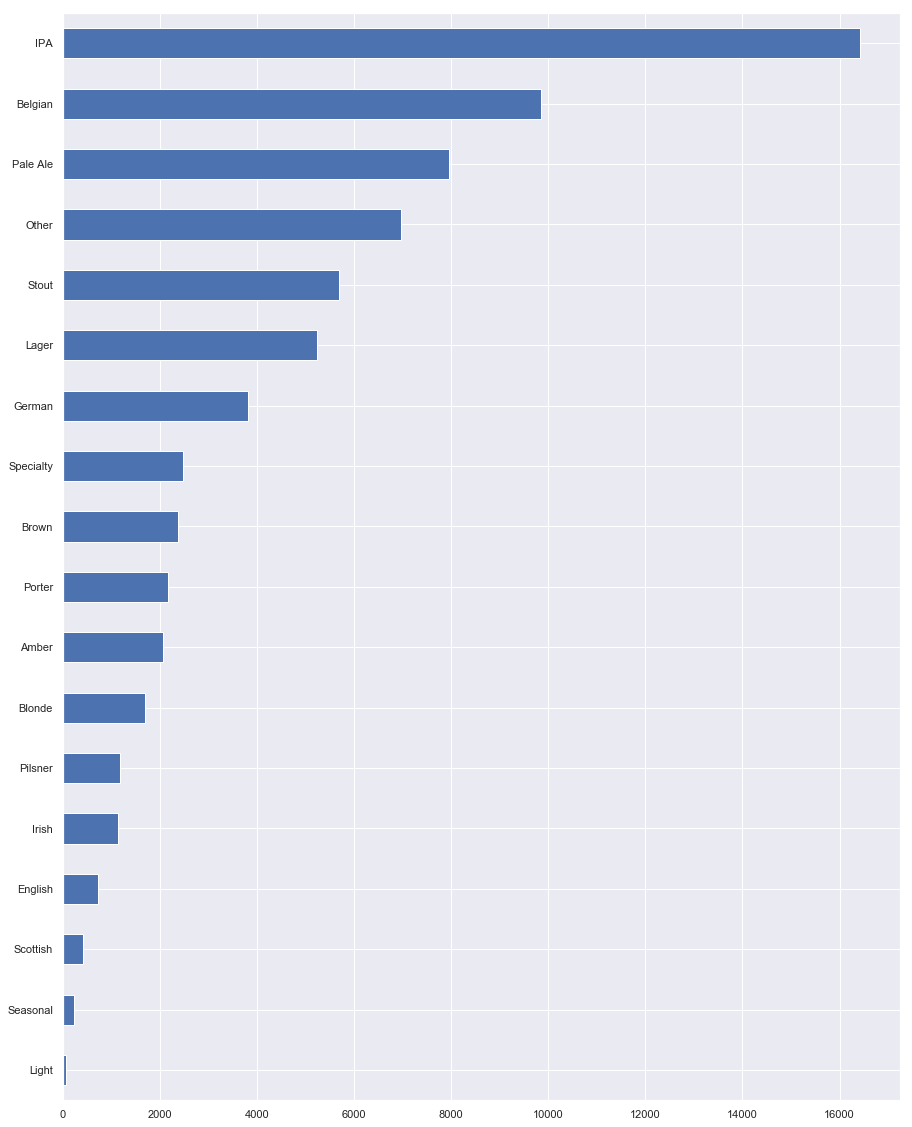

In [13]:
recipe['Parent_Style'].value_counts().sort_values().plot(kind='barh',figsize=(15,20));

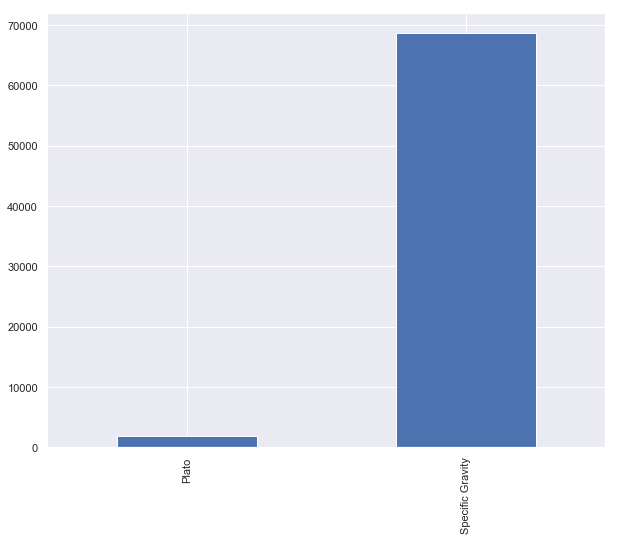

In [14]:
recipe['SugarScale'].value_counts().sort_values().plot(kind='bar',figsize=(10,8));

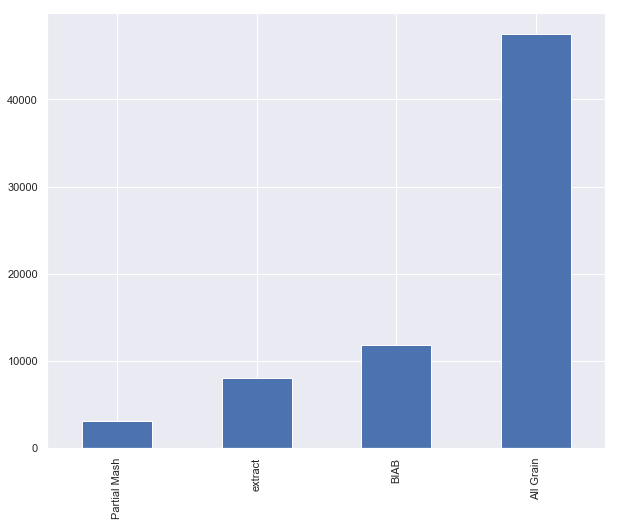

In [15]:
recipe['BrewMethod'].value_counts().sort_values().plot(kind='bar',figsize=(10,8));

Lets see if some features can distinguish between the styles.

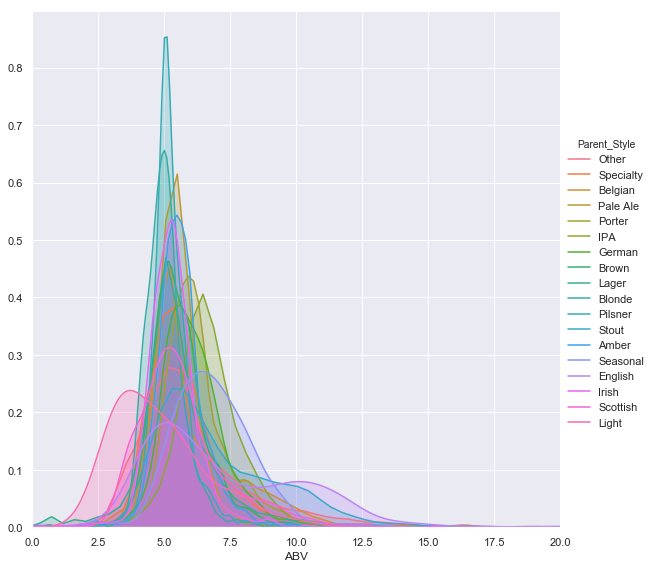

In [16]:
def facetgrid_Style(data,feature,xmin=None,xmax=None):
    if (xmin == None):
        xmin = data[feature].min()
    if (xmax == None):
        xmax = data[feature].max()
        
    facet = sns.FacetGrid(data, hue="Parent_Style", aspect=1,height=8)
    facet.map(sns.kdeplot, feature, shade= True)
    facet.set(xlim=(xmin, xmax))
    facet.add_legend()
    plt.show();
    
facetgrid_Style(recipe,'ABV',xmax=20)

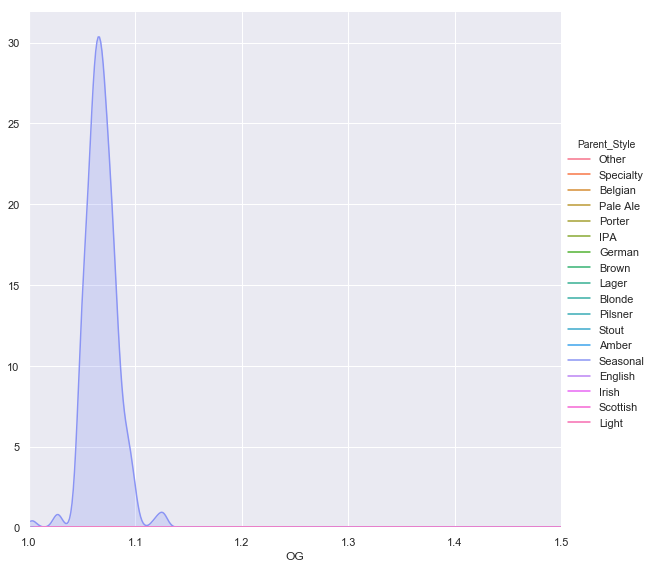

In [17]:
facetgrid_Style(recipe,'OG',xmin=1,xmax=1.5)

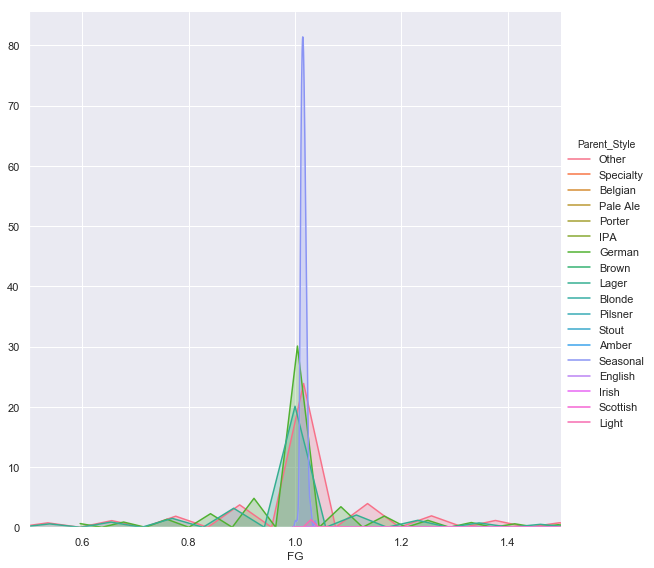

In [18]:
facetgrid_Style(recipe,'FG',xmin=0.5,xmax=1.5)

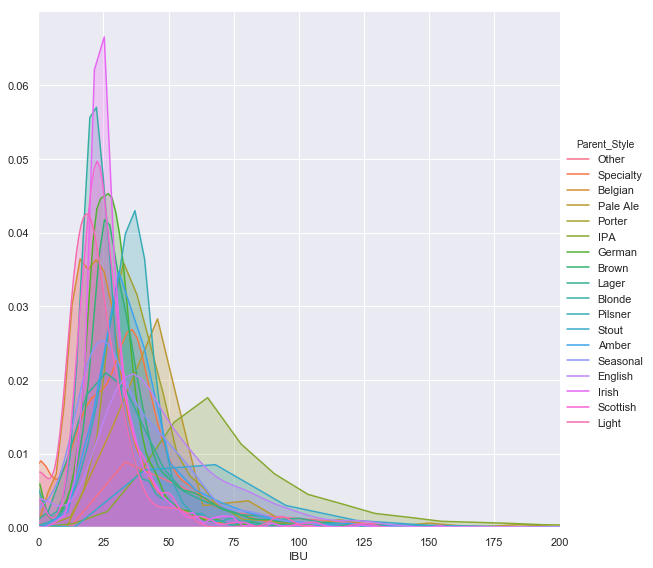

In [19]:
facetgrid_Style(recipe,'IBU',xmax=200)

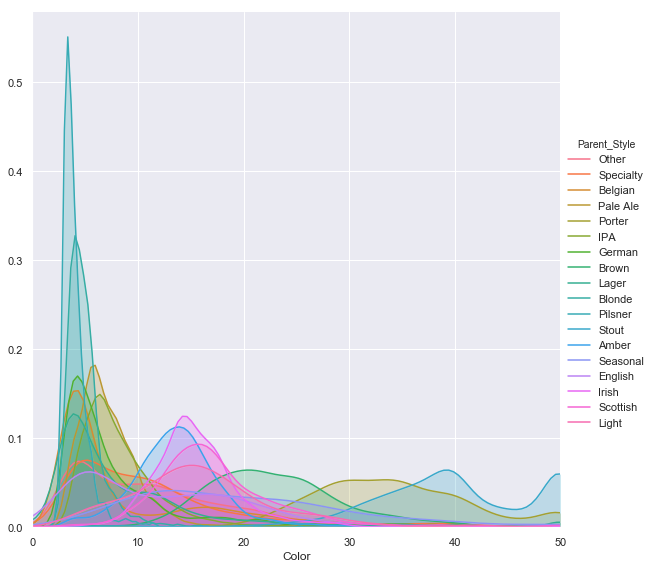

In [20]:
facetgrid_Style(recipe,'Color')

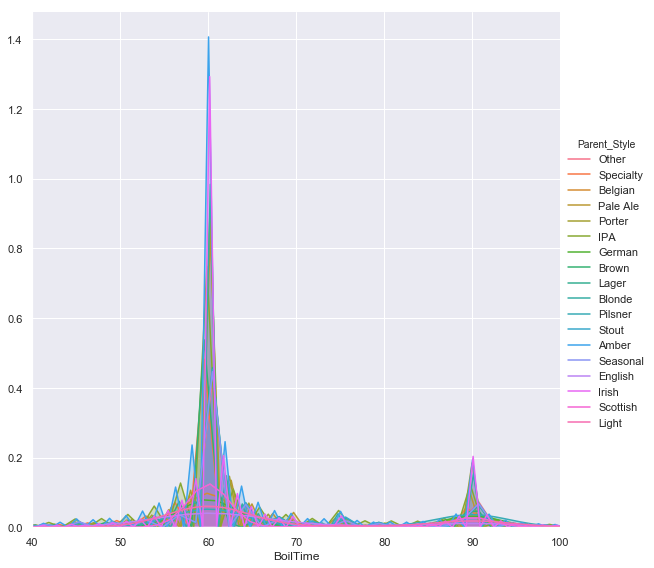

In [21]:
facetgrid_Style(recipe,'BoilTime',xmin=40,xmax=100)

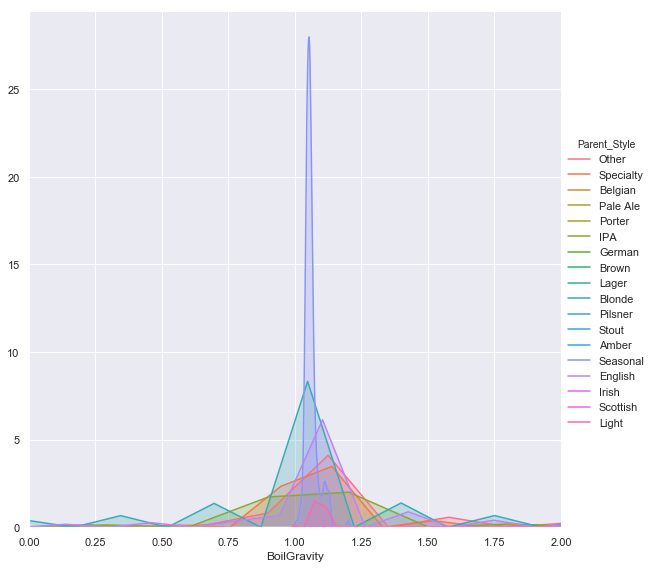

In [22]:
facetgrid_Style(recipe,'BoilGravity',xmax=2)

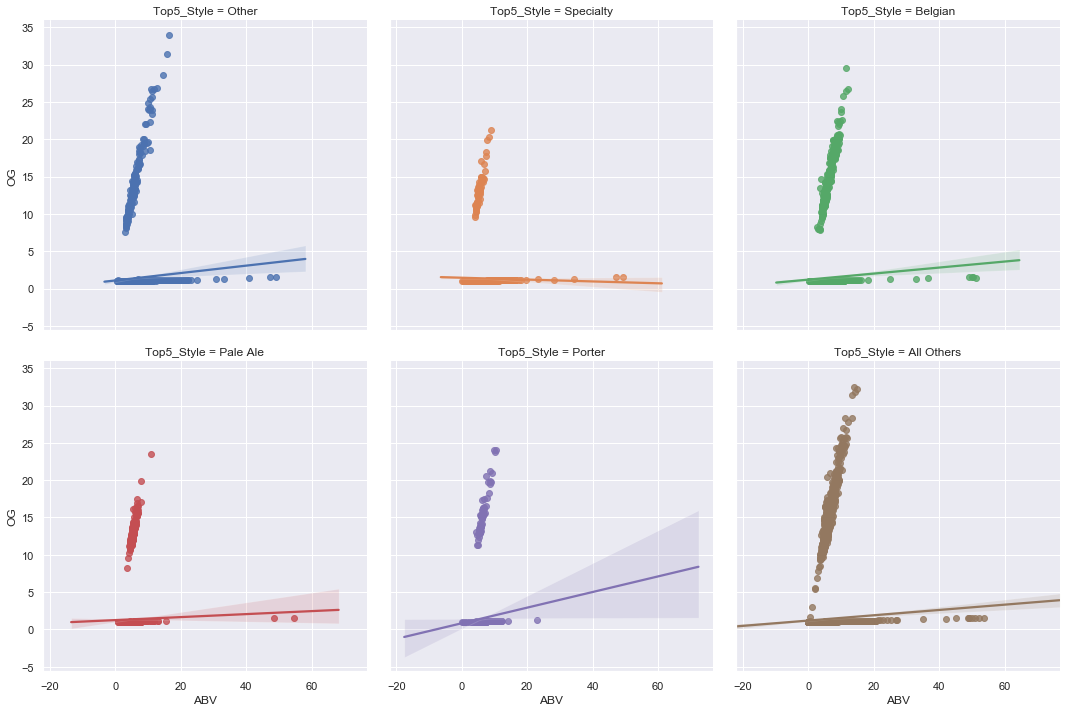

In [23]:
top5_style = list(recipe['Parent_Style'][:6].values)
recipe['Top5_Style'] = recipe.Parent_Style.apply(lambda x: x if x in top5_style else 'All Others')

def plot_stylegrid(feature, hue):
    sns.lmplot(x='ABV', y=feature, hue=hue, col=hue, col_wrap=3, data=recipe, n_boot=100)


plot_stylegrid('OG', 'Top5_Style')

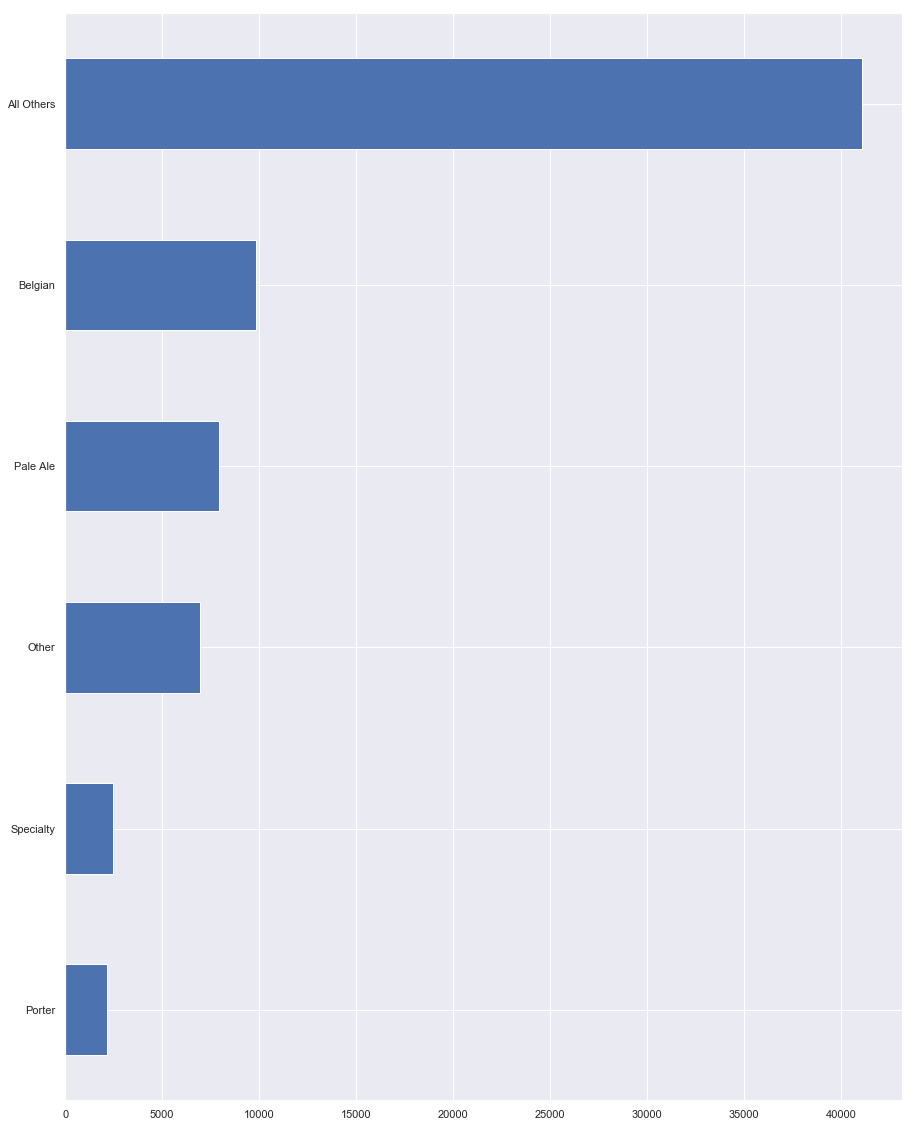

In [24]:
recipe['Top5_Style'].value_counts().sort_values().plot(kind='barh',figsize=(15,20));

There seems to be two seperate relationships in the `Original Gravity` measurements. If we look back at the beginning, we see that there are two seperate types of sugar scale measurements. Which, it turns out are two completely different ways of measuring the specific gravity of a liquid.

We can convert the plato measurement to the more common specific gravity measuremnt and see if there is any clear relationships.


In [25]:
# Conversion between plato measureent and specific gravity
# https://www.brewersfriend.com/plato-to-sg-conversion-chart/
def get_sg_from_plato(plato):
    return 1 + (plato / (258.6 - ( (plato/258.2) *227.1) ) )


In [26]:
# Convert the OG, FG and boil gravity measurments to the standard specific gravity units
recipe['OG_sg'] = recipe.apply(lambda row: get_sg_from_plato(row['OG']) \
                               if row['SugarScale'] == 'Plato' else row['OG'], axis=1)
recipe['FG_sg'] = recipe.apply(lambda row: get_sg_from_plato(row['FG']) \
                               if row['SugarScale'] == 'Plato' else row['FG'], axis=1)
recipe['BoilGravity_sg'] = recipe.apply(lambda row: get_sg_from_plato(row['BoilGravity']) \
                                        if row['SugarScale'] == 'Plato' else row['BoilGravity'], axis=1)

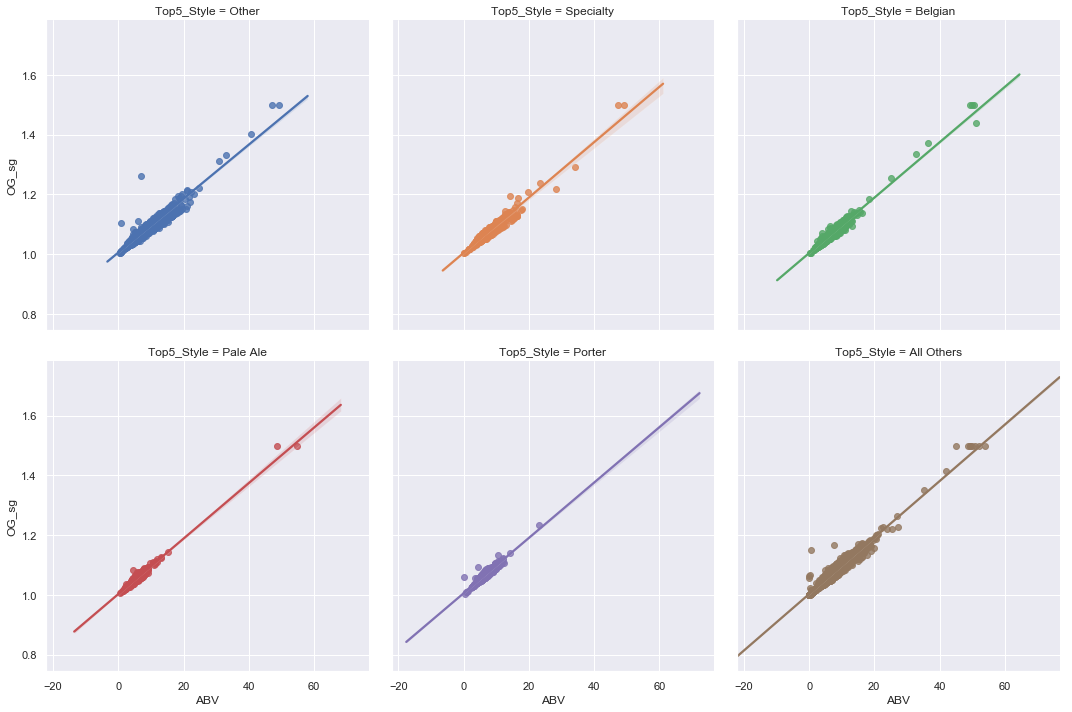

In [27]:
plot_stylegrid('OG_sg', 'Top5_Style')

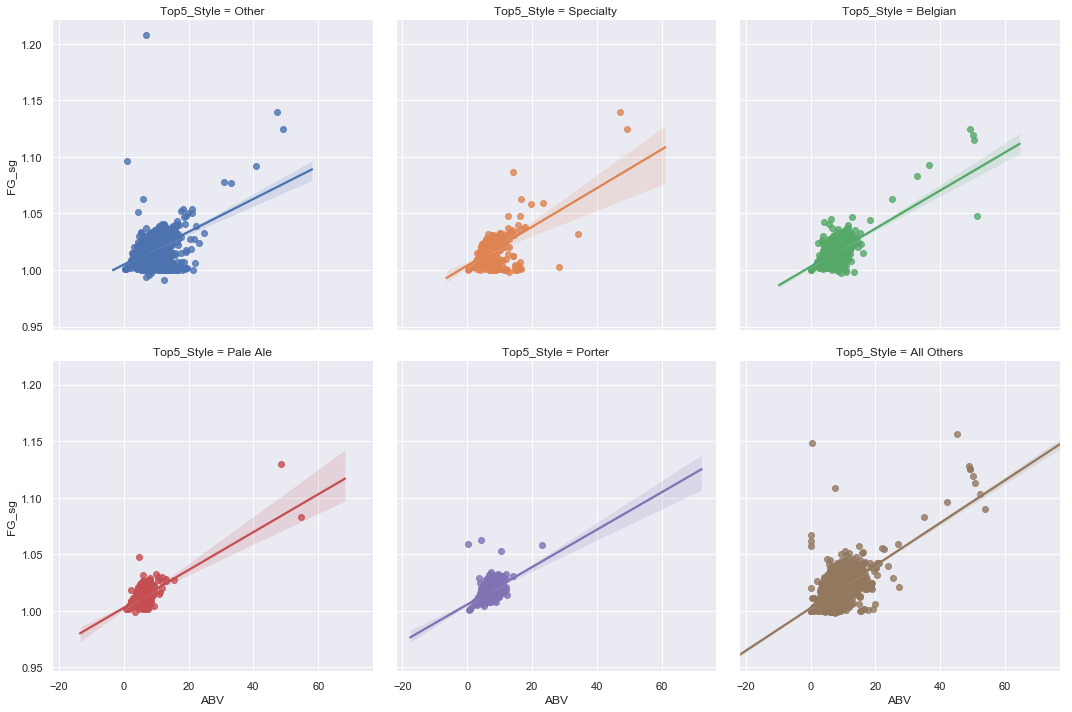

In [28]:
plot_stylegrid('FG_sg', 'Top5_Style')

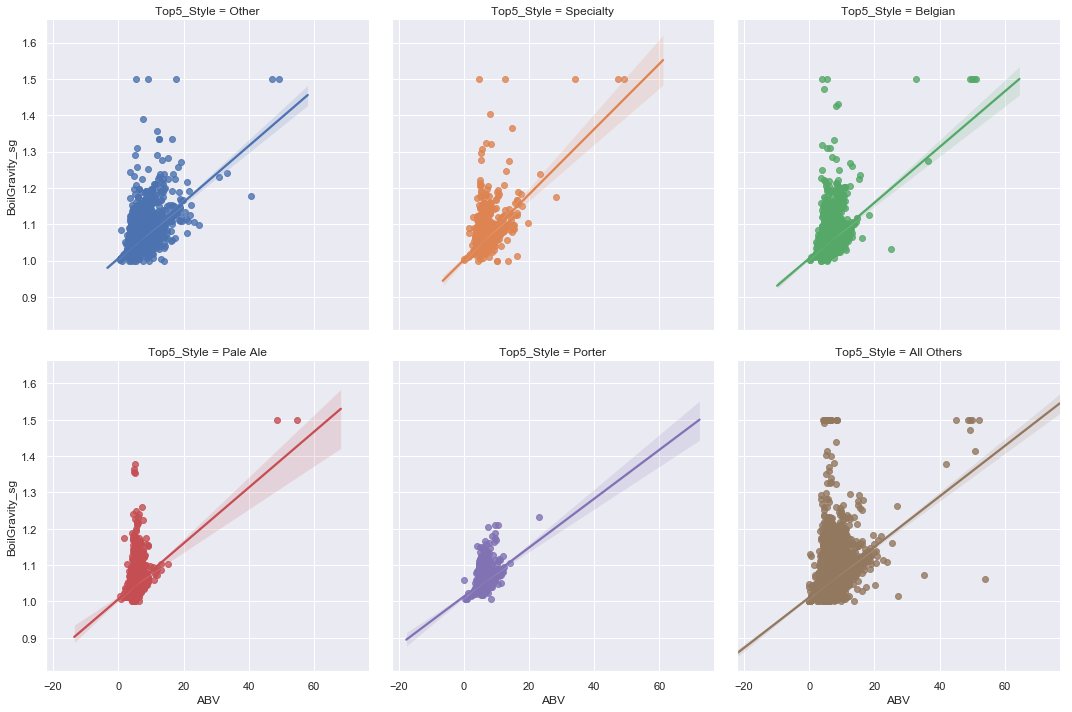

In [29]:
plot_stylegrid('BoilGravity_sg', 'Top5_Style')

Drop the original features that we used to create new features, as they will be highly correlated with each other.

In [30]:
# The Original Gravity should not be more than 2, these are likely to be 
# typos or miss understanding the measurements.
#recipe = recipe[recipe['OG'] < 2]
#recipe = recipe[recipe['FG'] > 0.5]
#recipe = recipe[recipe['IBU'] < 1000]
drop_features = ['SugarScale', 'BrewMethod', 'OG', 'FG', 'BoilGravity', 'StyleId', 'Style']
recipe.drop(drop_features,axis=1,inplace=True)

In [31]:
recipe.to_csv("Data/cleaned_recipe.csv",index=False)

In [ ]:
recipe.head()

,BeerID,Name,URL,Size(L),ABV,IBU,Color,BoilSize,BoilTime,Efficiency,...,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract,Top5_Style,OG_sg,FG_sg,BoilGravity_sg
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,21.77,5.48,17.65,4.83,28.39,75,70.0,...,0,1,1,0,0,0,Other,1.055,1.013,1.038
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,20.82,8.16,60.65,15.64,24.61,60,70.0,...,0,1,1,0,0,0,Specialty,1.083,1.021,1.070
2,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,50.00,6.48,17.84,4.57,60.00,90,72.0,...,0,1,1,0,0,0,Belgian,1.060,1.010,1.050
3,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,24.61,5.58,40.12,8.00,29.34,70,79.0,...,0,1,1,0,0,0,Pale Ale,1.055,1.013,1.047
4,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,20.82,5.36,19.97,5.94,28.39,75,70.0,...,0,1,1,0,0,0,Other,1.054,1.014,1.040


In [ ]:
recipe = pd.read_csv('Data/cleaned_recipe.csv',encoding='latin1')
recipe.head()

,BeerID,Name,URL,Size(L),ABV,IBU,Color,BoilSize,BoilTime,Efficiency,...,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract,Top5_Style,OG_sg,FG_sg,BoilGravity_sg
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,21.77,5.48,17.65,4.83,28.39,75,70.0,...,0,1,1,0,0,0,Other,1.055,1.013,1.038
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,20.82,8.16,60.65,15.64,24.61,60,70.0,...,0,1,1,0,0,0,Specialty,1.083,1.021,1.070
2,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,50.00,6.48,17.84,4.57,60.00,90,72.0,...,0,1,1,0,0,0,Belgian,1.060,1.010,1.050
3,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,24.61,5.58,40.12,8.00,29.34,70,79.0,...,0,1,1,0,0,0,Pale Ale,1.055,1.013,1.047
4,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,20.82,5.36,19.97,5.94,28.39,75,70.0,...,0,1,1,0,0,0,Other,1.054,1.014,1.040


## Develop The Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import xgboost as xgb

In [ ]:
features = ['Size(L)', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'Efficiency', 
            'BrewMethod_All Grain', 'BrewMethod_BIAB', 'BrewMethod_Partial Mash', 'BrewMethod_extract', 
            'OG_sg', 'FG_sg', 'BoilGravity_sg']

target = ['Parent_Style']

X = recipe[features]
y = recipe[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def retrain_model(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    print('XGBoost Accuracy: {}'.format(score))
    
    return model



In [ ]:
model = retrain_model(X_train, X_test, y_train, y_test)


XGBoost Accuracy: 0.5128096048402344


### What features are important

In [ ]:
def feature_plot(model,X):
    
    feats_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['FeatureImportance'])
    feats_imp = feats_imp.sort_values('FeatureImportance', ascending=False)

    feats_imp.plot(kind='barh', figsize=(12,6), legend=False)
    plt.title('Feature Importance from XgBoost Classifier')
    sns.despine(left=True, bottom=True)
    plt.gca().invert_yaxis()

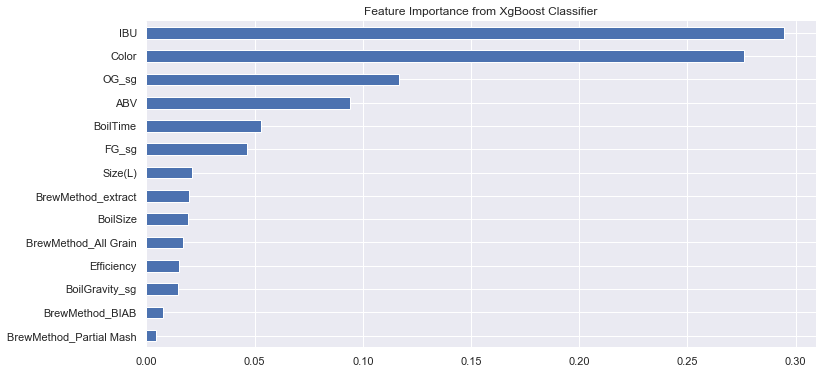

In [ ]:
feature_plot(model,X)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

print ('Score: ',accuracy_score(y_test, y_pred))
print (classification_report(y_test,y_pred))

Score:  0.5128096048402344
              precision    recall  f1-score   support

       Amber       0.29      0.30      0.29       623
     Belgian       0.44      0.68      0.54      2954
      Blonde       0.47      0.13      0.21       508
       Brown       0.38      0.44      0.41       711
     English       0.73      0.07      0.13       221
      German       0.37      0.24      0.29      1149
         IPA       0.69      0.82      0.75      4924
       Irish       0.31      0.27      0.29       344
       Lager       0.36      0.13      0.20      1572
       Light       0.00      0.00      0.00        20
       Other       0.39      0.23      0.29      2088
    Pale Ale       0.43      0.57      0.49      2386
     Pilsner       0.42      0.31      0.36       355
      Porter       0.39      0.22      0.28       651
    Scottish       0.00      0.00      0.00       125
    Seasonal       0.00      0.00      0.00        70
   Specialty       0.22      0.01      0.01       746


Lets take a look at using Forward Feature Collection

In [ ]:
recipe = pd.read_csv('Data/cleaned_recipe.csv',encoding='latin1')

features = ['Size(L)', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'Efficiency', 
            'BrewMethod_All Grain', 'BrewMethod_BIAB', 'BrewMethod_Partial Mash', 'BrewMethod_extract', 
            'OG_sg', 'FG_sg', 'BoilGravity_sg']

target = ['Parent_Style']

X = recipe[features]
y = recipe[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'score': 0}
# create a model object to hold the modelling parameters
model =  xgb.XGBClassifier()
# get the number of cases in the test data
#n = X_test.shape[0]

model_score = []

In [ ]:

while True:
    changed = False
    
    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        model_score.append(model.score(X_test[included + [new_column]], y_test))
        
        # if model improves
        if model_score[-1] > best['score']:
            # record new parameters
            best = {'feature': new_column , 'score': model_score[-1]}
            # flag that found a better model
            changed = True
            

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print (best['feature'])
        print (best['score'])
        #print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
        #      (best['feature'], best['score']))
    else:
        print (included)
        # terminate if no better model
        break


IBU
0.3672244280582341
Color
0.45755341274342975
ABV
0.5003781433163169
FG_sg
0.5063811684628474
BoilTime
0.5098789941387786
OG_sg
0.5120533182076007
BoilSize
0.5123841936093779
['IBU', 'Color', 'ABV', 'FG_sg', 'BoilTime', 'OG_sg', 'BoilSize']


In [ ]:
# Base model

# Simplest predictor.
recipe = pd.read_csv('Data/cleaned_recipe.csv',encoding='latin1')


X = recipe[['OG_sg']]
y = recipe['Parent_Style']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)



model = retrain_model(X_train, X_test, y_train, y_test)

XGBoost Accuracy: 0.3043108338060125


In [ ]:
# Best model

#recipe = pd.read_csv('Data/cleaned_recipe.csv',encoding='latin1')


X = recipe[included]
y = recipe['Parent_Style']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)



model = retrain_model(X_train, X_test, y_train, y_test)

XGBoost Accuracy: 0.5123841936093779


In [ ]:

def optimise_randomForest(X_train, X_test, y_train, y_test):
    optimum = {'min_samples_leaf': 0, 'max_features': None, 'oob_score': None, 'score': 0}


    min_samples_leaf = list(range(1,6))
    max_features = ['auto','log2',0.2,0.5,0.7,0.8,0.9,1.0]
    oob_score = [False, True]

    for samples in min_samples_leaf:
        for feature in max_features:
            for oob in oob_score:
                model = RandomForestClassifier(min_samples_leaf=samples,max_features=feature,oob_score=oob)
                model.fit(X_train, y_train)

                y_pred = model.predict(X_test)

                score = accuracy_score(y_test, y_pred)
                #print('{0}, {1}, {2} Accuracy: {3}'.format(samples,feature,oob,score))

                if score > optimum['score']:
                    optimum = {'min_samples_leaf': samples, 
                                'max_features': feature, 
                                'oob_score': oob, 
                                'score': score}

                

    print (optimum)
    return optimum

optimum = optimise_randomForest(X_train, X_test, y_train, y_test)

{'min_samples_leaf': 5, 'max_features': 0.5, 'oob_score': True, 'score': 0.5044431839667234}


In [ ]:
#optimum = {'min_samples_leaf': 5, 'max_features': 0.8, 'oob_score': False, 'score': 0.5093590470788428}

model = RandomForestClassifier(min_samples_leaf=optimum['min_samples_leaf'],
                               max_features=optimum['max_features'],
                               oob_score=optimum['oob_score'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

print ('Score: ',accuracy_score(y_test, y_pred))
print (classification_report(y_test,y_pred))

Score:  0.5035450935904708
              precision    recall  f1-score   support

       Amber       0.28      0.26      0.27       623
     Belgian       0.48      0.63      0.54      2954
      Blonde       0.33      0.21      0.26       508
       Brown       0.38      0.38      0.38       711
     English       0.54      0.09      0.15       221
      German       0.33      0.26      0.29      1149
         IPA       0.69      0.81      0.74      4924
       Irish       0.32      0.26      0.29       344
       Lager       0.33      0.18      0.23      1572
       Light       0.00      0.00      0.00        20
       Other       0.35      0.31      0.33      2088
    Pale Ale       0.44      0.51      0.47      2386
     Pilsner       0.38      0.29      0.33       355
      Porter       0.36      0.25      0.29       651
    Scottish       0.18      0.02      0.03       125
    Seasonal       0.00      0.00      0.00        70
   Specialty       0.16      0.03      0.05       746


In [ ]:
def optimise_xgboost(X_train, X_test, y_train, y_test):

    optimum = {'learning_rate': 0, 'n_esimators': 0, 'min_samples_leaf': 0, 
                'max_depth': 0, 'max_features': '', 'score': 0}
    
    learning = [0.01, 0.03, 0.05, 0.08 , 0.1]
    estimators = [10, 50, 100, 200]
    min_samples_leaf = list(range(1,6))
    max_depth = [3, 5, 6, 7, 8, 9, 10]
    max_features = ['auto','log2',0.2,0.5,0.7,0.9]
    
    for learn in learning:
        print ('learning rate:',learn)
        for n in estimators:
            print ('    estimators:',n)
            for leaf in min_samples_leaf:
                for depth in max_depth:
                    for feature in max_features:
    
                        model = xgb.XGBClassifier(learning_rate=learn,
                                                  n_estimators=n,
                                                  min_samples_leaf=leaf,
                                                  max_depth=depth,
                                                  max_features=feature)

                        model.fit(X_train, y_train)

                        y_pred = model.predict(X_test)

                        score = accuracy_score(y_test, y_pred)
                        
                        if score > optimum['score']:
                            optimum = {'learning_rate': learn, 
                                        'n_esimators': n, 
                                        'min_samples_leaf': leaf,    
                                        'max_depth': depth, 
                                        'max_features': feature,
                                        'score': score}
    
    
    print (optimum)

optimum = optimise_xgboost(X_train, X_test, y_train, y_test)

learning rate: 0.01
    estimators: 10
    estimators: 50
    estimators: 100
    estimators: 200


In [ ]:
model = xgb.XGBClassifier(learning_rate=optimum['learning_rate'],
                          n_estimators=optimum['n_estimators'],              
                          min_samples_leaf=optimum['min_samples_leaf'],     
                          max_depth=optimum['max_depth'],     
                          max_features=optimum['max_features'])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

print (classification_report(y_test,y_pred))

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.01,
                          n_estimators=200,              
                          min_samples_leaf=1,     
                          max_depth=8,     
                          max_features='auto')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

print (classification_report(y_test,y_pred))

In [ ]:
print (score)